In [84]:
import sympy

def matmul(mat1: sympy.Matrix, mat2: sympy.Matrix):
    return mat1 @ mat2

def transpose(matrix: sympy.Matrix):
    return matrix.T

def determinant(matrix: sympy.Matrix):
    return matrix.det()

def polynomial_roots(polynomial):
    return sympy.solve(polynomial)

def gaussian_elimination(matrix: sympy.Matrix):
    for col in range(min(matrix.shape[0], matrix.shape[1])):
        if matrix[col, col] == 0:
            for row in range(col + 1, matrix.shape[0]):
                matrix[col, :] += matrix[row, :]
        if matrix[col, col] == 0:
            continue
        for row in range(matrix.shape[0]):
            if row == col:
                continue
            matrix[row, :] -= matrix[col, :] * matrix[row, col] / matrix[col, col]
        matrix[col, :] /= matrix[col, col]
    return matrix

def inverse(matrix: sympy.Matrix):
    assert matrix.shape[0] == matrix.shape[1]
    eye = sympy.eye(matrix.shape[0])
    ext = sympy.Matrix.hstack(matrix, eye)
    ext = gaussian_elimination(ext)
    return ext[:, matrix.shape[0]:]

### Task 1

In [85]:
B = sympy.Matrix([
    [ -69, 6, -66 ],
    [ -34, -128, 64 ],
    [ -132, 6, 60 ],
    [ -54, 0, 108 ]
])
BtB = matmul(transpose(B), B)
BtB

Matrix([
[ 26257,  3146, -11374],
[  3146, 16456,  -8228],
[-11374, -8228,  23716]])

In [86]:
lambd = sympy.Symbol('lambda')
char_pol = determinant(BtB - lambd * sympy.eye(3))
char_pol

-lambda**3 + 66429*lambda**2 - 1238101524*lambda + 6694969951296

In [87]:
l3, l2, l1 = polynomial_roots(char_pol)
display(l1, l2, l3)

39204

17424

9801

In [88]:
display(sympy.sqrt(l1))
display(BtB - l1 * sympy.eye(3))
display(gaussian_elimination(BtB - l1 * sympy.eye(3)))

198

Matrix([
[-12947,   3146, -11374],
[  3146, -22748,  -8228],
[-11374,  -8228, -15488]])

Matrix([
[1, 0,   1],
[0, 1, 1/2],
[0, 0,   0]])

In [89]:
display(sympy.sqrt(l2))
display(BtB - l2 * sympy.eye(3))
display(gaussian_elimination(BtB - l2 * sympy.eye(3)))

132

Matrix([
[  8833,  3146, -11374],
[  3146,  -968,  -8228],
[-11374, -8228,   6292]])

Matrix([
[1, 0, -2],
[0, 1,  2],
[0, 0,  0]])

In [90]:
display(sympy.sqrt(l3))
display(BtB - l3 * sympy.eye(3))
display(gaussian_elimination(BtB - l3 * sympy.eye(3)))

99

Matrix([
[ 16456,  3146, -11374],
[  3146,  6655,  -8228],
[-11374, -8228,  13915]])

Matrix([
[1, 0, -1/2],
[0, 1,   -1],
[0, 0,    0]])

In [91]:
u1 = sympy.Matrix([ -2, -1, 2 ]) / sympy.S(3)
matmul(B, u1) / sympy.sqrt(l1)

Matrix([
[   0],
[6/11],
[7/11],
[6/11]])

In [92]:
u2 = sympy.Matrix([ 2, -2, 1 ]) / sympy.S(3)
matmul(B, u2) / sympy.sqrt(l2)

Matrix([
[-6/11],
[ 7/11],
[-6/11],
[    0]])

In [93]:
u3 = sympy.Matrix([ 1, 2, 2 ]) / sympy.S(3)
matmul(B, u3) / sympy.sqrt(l3)

Matrix([
[-7/11],
[-6/11],
[    0],
[ 6/11]])

In [94]:
V = sympy.Matrix([
    [ 0, 6, 7, 6 ],
    [ -6, 7, -6, 0 ],
    [ -7, -6, 0, 6 ]
])
gaussian_elimination(V)

Matrix([
[1, 0, 0, -6/7],
[0, 1, 0,    0],
[0, 0, 1,  6/7]])

### Task 2

In [95]:
F = sympy.Matrix([
    [ 4, -11 ],
    [ -2, 7 ],
    [ -1, 4 ],
    [ 3, -8 ]
])
G = sympy.Matrix([
    [ 1, 0, 12 ],
    [ 0, 1, 3 ]
])
display(F, G)

Matrix([
[ 4, -11],
[-2,   7],
[-1,   4],
[ 3,  -8]])

Matrix([
[1, 0, 12],
[0, 1,  3]])

In [96]:
ggt = matmul(G, transpose(G))
display(ggt)
g_pinv = matmul(transpose(G), inverse(ggt)) * 154
display(g_pinv)

Matrix([
[145, 36],
[ 36, 10]])

Matrix([
[ 10, -36],
[-36, 145],
[ 12,   3]])

In [97]:
ftf = matmul(transpose(F), F)
display(ftf)
f_pinv = matmul(inverse(ftf), transpose(F)) * 52
display(f_pinv)

Matrix([
[ 30, -86],
[-86, 250]])

Matrix([
[27, 51, 47, 31],
[ 7, 19, 17,  9]])

In [98]:
matmul(g_pinv, f_pinv)

Matrix([
[ 18, -174, -142, -14],
[ 43,  919,  773, 189],
[345,  669,  615, 399]])

### Task 3

In [99]:
A = sympy.Matrix([
    [ 4, 6, 12, -2 ],
    [ 3, 5, 15, 7 ],
    [ -1, 1, 8, -14 ],
    [ -2, 0, 9, -11 ]
])
b = sympy.Matrix([ 0, 4, 1, 2 ])
gaussian_elimination(A)

Matrix([
[1, 0, 0,  19],
[0, 1, 0, -19],
[0, 0, 1,   3],
[0, 0, 0,   0]])

In [100]:
F = sympy.Matrix([
    [ 4, 6, 12 ],
    [ 3, 5, 15 ],
    [ -1, 1, 8 ],
    [ -2, 0, 9 ]
])
G = sympy.Matrix([
    [ 1, 0, 0, 19 ],
    [ 0, 1, 0, -19 ],
    [ 0, 0, 1, 3 ]
])

ggt = matmul(G, transpose(G))
g_pinv = matmul(transpose(G), inverse(ggt))

ftf = matmul(transpose(F), F)
f_pinv = matmul(inverse(ftf), transpose(F))

a_pinv = matmul(g_pinv, f_pinv)
ans = matmul(a_pinv, b)
display(ans)
display(ans.evalf())

Matrix([
[-321985/734928],
[-284111/734928],
[  94799/244976],
[ 133585/734928]])

Matrix([
[-0.438117747588879],
[-0.386583447630244],
[ 0.386972601397688],
[ 0.181766104978991]])

### Task 4

In [101]:
x = sympy.Symbol('x')
f1 = -11 * x * (x - 1) * (x - 2) / sympy.S(-24)
f2 = -1 * (x + 2) * (x - 2) * (x - 1) / sympy.S(2)
f3 = 3 * x * (x + 2) * (x - 2) / sympy.S(-1)
f4 = 3 * x * (x - 1) * (x + 2) / sympy.S(4)
f = (f1 + f2 + f3 + f4).simplify()
f

-55*x**3/24 - x**2/8 + 161*x/12 - 2

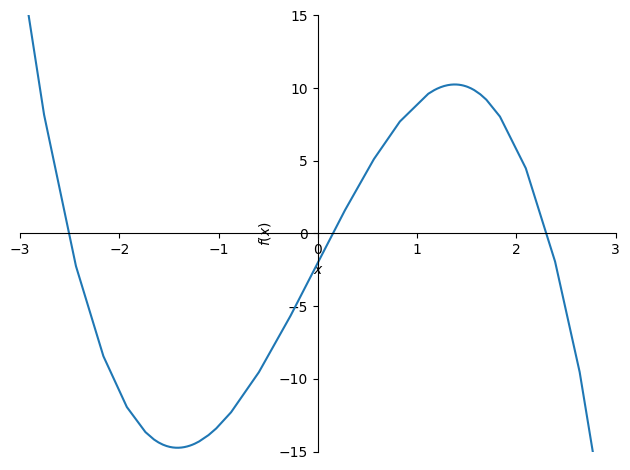

In [102]:
sympy.plot(f, xlim = (-3, 3), ylim = (-15, 15))

### Task 5

In [103]:
t = sympy.Symbol('t')
b1 = (1 - t) ** 3 * sympy.Matrix([ 1, 2 ])
b2 = 3 * (1 - t) ** 2 * t * sympy.Matrix([ 6, 8 ])
b3 = 3 * (1 - t) * t ** 2 * sympy.Matrix([ 7, 7 ])
b4 = t ** 3 * sympy.Matrix([ 9, 0 ])
b = sympy.simplify(b1 + b2 + b3 + b4)
b

Matrix([
[5*t**3 - 12*t**2 + 15*t + 1],
[  t**3 - 21*t**2 + 18*t + 2]])

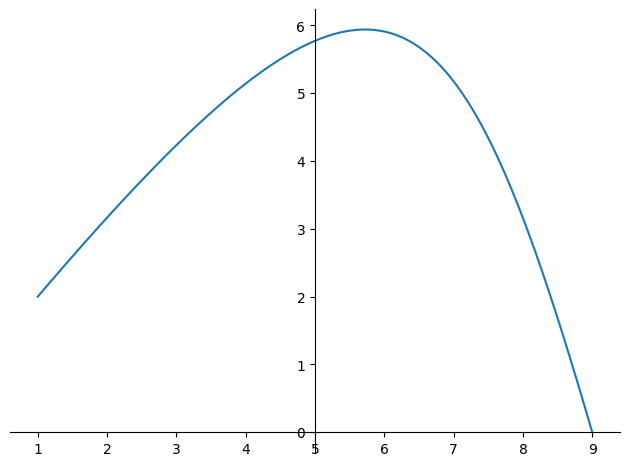

In [104]:
sympy.plot_parametric((b[0], b[1]), (t, 0, 1))

### Task 7

In [105]:
x = sympy.Symbol('x')
v1 = 1
v2 = x
v3 = x ** 2
v4 = x ** 3

def skalmul(f, g, extract_pi = True):
    denom = (2 * x - 4) ** 2
    func = f * g / sympy.sqrt(1 - denom / 16)
    if extract_pi:
        func /= sympy.pi
    integral = sympy.integrate(func.simplify(), (x, 0, 4), manual = True).evalf()
    if extract_pi:
        integral *= sympy.pi
    return integral

In [106]:
b1 = 1
display(skalmul(b1, v2))
display(skalmul(b1, b1))

4.0*pi

2.0*pi

In [107]:
b2 = x - 2
display(skalmul(v2, b1))
display(skalmul(v2, b2))
display(skalmul(b2, b2))

4.0*pi

4.0*pi

4.0*pi

In [108]:
b3 = x ** 2 - 4 * x + 2
display(skalmul(v3, b1))
display(skalmul(v3, b2))
display(skalmul(v3, b3))
display(skalmul(b3, b3))

12.0*pi

16.0*pi

4.0*pi

4.0*pi

In [109]:
f = sympy.sqrt(4 * x + 3)
b4 = x ** 3 - 6 * (x ** 2) + 9 * x - 2
k1 = skalmul(b1, f, extract_pi = False)
k2 = skalmul(b2, f, extract_pi = False)
k3 = skalmul(b3, f, extract_pi = False)
k4 = skalmul(b4, f, extract_pi = False)
display(k1)
display(k2)
display(k3)
display(k4)
display(skalmul(b4, b4))

20.0359095658379

8.05587884880847

-0.847102907354178

0.180321876012497

4.0*pi

In [110]:
k1 /= 2 * sympy.pi
k2 /= 4 * sympy.pi
k3 /= 4 * sympy.pi
k4 /= 4 * sympy.pi
display(k1.evalf())
display(k2.evalf())
display(k3.evalf())
display(k4.evalf())

3.18881404674529

0.641066469868658

-0.0674103075064666

0.0143495589574964

In [112]:
ans = k1 * b1 + k2 * b2 + k3 * b3 + k4 * b4
ans.simplify().evalf()

0.0143495589574964*x**3 - 0.153507661251445*x**2 + 1.03985373051199*x + 1.74316137408004

### Task 8

In [113]:
l = sympy.Symbol('lambda')
q = sympy.Symbol('q')

In [120]:
char_poly = (2 * q + 4 - l) * (1 - 8 * q - l) - (2 * q + 2) ** 2
char_poly.simplify().collect(l)

lambda**2 + lambda*(6*q - 5) - 20*q**2 - 38*q